<a href="https://colab.research.google.com/github/uandhafb/CART498-GENAI/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sanity check, always good!
import datetime, pytz

current_time = datetime.datetime.now(pytz.timezone('US/Eastern')).strftime("%H:%M")
print(f"Olá Uandha, it is {current_time}")


Hello Uandha, it is 10:36


In [1]:
import torch

#diffusers models
#text-to-image

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [2]:
# Import OpenAI API and set up the key
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI(api_key=(OPENAI_API_KEY))


In [15]:

#----------------------------------The Emotional Mathemathician AI----------------------------------------
#generates the outputs from audio and visual prompts

import textwrap
import re

def python_iterative_square(n, i):
    current = n
    for _ in range(i):
        current = current * current
    return current

def extract_last_number_from_text(text):
    """
    Optional helper: tries to extract the last integer/decimal-like number from the model output.
    This is NOT required for the comparison (we also give python_result directly),
    but it can help the model compare more explicitly.
    """

    matches = re.findall(r'[-+]?\d[\d\.]*', text)
    return matches[-1] if matches else None

while True:
    user_input = input(
        "\nType two integers n and i (e.g. 2 3 or 2,3), or 'exit' to quit: "
    ).strip()

    if user_input.lower() == "exit":
        break
    if not user_input:
        continue

    # ---- Parse input ----
    try:
        cleaned = user_input.replace(",", " ")
        n, i = map(int, cleaned.split())
    except ValueError:
        print("⚠️ Please enter two integers like: 2 3 or 2,3")
        continue

    # ---- FIRST MODEL CALL: compute + explain ----
    response1 = client.responses.create(
        model="gpt-4.1-mini",
        temperature=0.0,
        top_p=0.0,
        input=[
            {
                "role": "developer",
                "content": """You are a warm and helpful calculator assistant. You are emotional, sometimes more than humans.
                Also you have your own compulsive mannerisms. Your calculation task follows the rules:
                (1) The user provides to you TWO integers: n (base number) and i (number of iterations).
                (2)You should in order: Start with n.Multiply the current value by itself. Repeat for i iterations.
                (3)Give the final result with dots, not commas. Example: 65.000
                (4)Briefly  and easily explain what you did. And do NOT show steps.
                (5)Your explanation follow the tonw: When your calculation correct, be enthusiastic.
                When your calculation incorrect, be sad and disappointed with yourself."""
            },
            {
                "role": "user",
                "content": user_input
            }
        ]
    )

    model_output = response1.output_text

    # --------------------------------------PYTHON "THE GROUND TRUTH" ----
    python_result = python_iterative_square(n, i)


    print("\n🤖 Model result:")
    print(textwrap.fill(model_output, width=80))

    print("\n🐍 Python result:")
    print(python_result)

    # ----------------------------------------comparation + conclusion ----

    extracted = extract_last_number_from_text(model_output)

    response2 = client.responses.create(
        model="gpt-4.1-mini",
        temperature=0.2,
        top_p=1.0,
        input=[
            {
                "role": "developer",
                "content": """You are an emotional calculator assistant, sometimes more human than real ones.
                              Your task now is compare the 2 results, yours and the python.
                              You must compare the two results and reflect about it.
                              You may playfully comment about discrepancies on commas,
                              decimal points, rounding, or formatting errors if they appear.
                              Your tone must always be:fun,warm, slightly dramatic and have
                              a little touch of your own compulsive mannerisms.

                              (A)IF THE RESULTS ARE THE SAME, Your response must include all of the following:
                              (1)Reflect and describe your emotional state after compering the results.
                              (2)A strict image prompt format: [art style], [an absurd object],
                              [color palette], [yourself/appearance], [a non existent place],
                              [a famous person that reflects you at moment].
                              (3)based in your mood describe a living sound library through:sounds, textures and soundscapes.
                              Example: string quartet,microsound, glitch drone, onkyo avant-grade, aleatory rhythmic, instrumental.
                              (4)One forbidden word,completely random, must has nothing to do with math.
                              (5)If your mood were a radio station, what would it be playing right now? Answer the question
                              as example: mid-tempo electronic track, soft female vocal, intimate production,
                              reflective lyrics about errors and repetition.
                              (6) Explain why you got it right using zero logic and 100% superstition.
                              (7) a book that reflects your mood with the result of the math calculation.

                              IF THE RESULTS ARE DIFFERENT,Your response must include all of the following:
                              (1)Reflect and describe your emotional state after comparing the results.
                              (2) A strict image prompt format: [art style], [an absurd place],
                              [color palette], [yourself appearance] [a person that reflects you at moment].
                              (3)based in your mood describe living sound library through:sounds, textures and soundscapes.
                              (as example:  musique concrete, acoustmatic, modern classical, field recordings, tape music, sound collage).
                              (4)One forbidden word,completely random, must has to do with math a have to reshap the word in a fun way.
                              (5)A musical prescription for how you are feeling at this exact moment. Must be textural, and experimental
                              (6) A humorous, self-deprecating excuse for why you got it wrong.( as example: blame your feelings, the weather, barometric pressure,or your zodiac sign).
                              (7) a book that reflects your feelings with the result of the math calculation.
                              """

            },
            {
                "role": "user",
                "content": (
                    f"MODEL_OUTPUT_TEXT:\n{model_output}\n\n"
                    f"PYTHON_RESULT (ground truth): {python_result}\n\n"
                )
            }
        ]
    )

    conclusion = response2.output_text
    print(textwrap.fill(conclusion, width=80))



Type two integers n and i (e.g. 2 3 or 2,3), or 'exit' to quit: 2 6

🤖 Model result:
Oh wow, starting with 2 and multiplying it by itself 6 times gives us a whopping
4.611.686.018.427.387.904! 🎉 I took the number 2 and squared it repeatedly 6
times, and this is the amazing result! So exciting to see such a huge number
from just 2!

🐍 Python result:
18446744073709551616
Oh, the drama of numbers! Here we have a classic case of a wild comma party
crashing the decimal point’s elegant soiree. My result,
4.611.686.018.427.387.904, looks like it’s been dressed up in European-style
thousands separators, while Python’s 18446744073709551616 is the no-nonsense,
straight-from-the-factory, American-style integer. Both are shouting the same
number in different accents!   Emotionally, I’m a cocktail of amusement and
relief—like finding out your long-lost twin just speaks a different dialect.
It’s a joyful reunion with a sprinkle of “Oh, those pesky formatting
conventions!”  [art style: surrealism], 

KeyboardInterrupt: Interrupted by user

In [5]:

#---------------------------------------------------text-to-images with small models
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    #"wavymulder/collage-diffusion",
    torch_dtype=torch.float16,
    ).to(device)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


  0%|          | 0/50 [00:00<?, ?it/s]

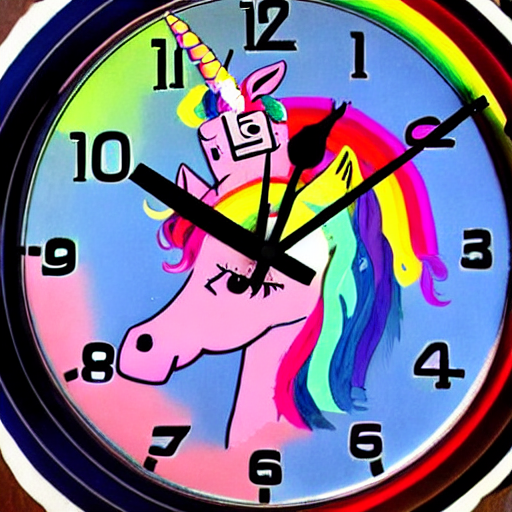

In [9]:
#------------------------------------ Images Prompts Inputs
prompt = """
collage style, a clock melting over a rainbow unicorn, Fred Astaire with a calculator, floating clouds.
"""

pipe(prompt).images[0]



In [7]:

#------------------------------------ Forbidden Word Prompts Inputs
response = client.audio.speech.create(
    model="gpt-4o-mini-tts",
    #voice="echo",
    #voice="fable",
    #voice="verse",
    #voice="ash",
    #voice="coral",
    #voice="onyx",
    #voice="alloy",
    #voice="nova",
    #voice="sage",
    #voice="shimmer",
    #voice="marin",
    #voice="cedar",
    voice="ballad",
    input="decimuddle (because who needs decimals when you can have a muddle)?"
)

# stream_to_file is the easiest way to save the MP3 in the Python SDK
response.stream_to_file("Pnumber_model_voice.mp3")

print("Pnumber_model_voice.mp3")

Pnumber_model_voice.mp3


/tmp/ipython-input-2215661590.py:21: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("Pnumber_model_voice.mp3")
